In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import get_works_from_years

In [2]:
# Get data
df = get_works_from_years(start_year=2000, end_year=2023)

In [3]:
df.shape

(22049, 7)

In [4]:
df.head()

,title,type,citations,published_date,updated_date,text,url
id,,,,,,,
1333645,Communal weeding,,None,2000-12-06T00:00:00,2019-12-02T14:00:48,http://genomebiology.com/2000/1/6/reports/4024...,https://core.ac.uk/download/pdf/3232542.pdf
123838892,"Smart News, Issues 6, Summer 2001",research,None,2001-01-01T00:00:00,2022-05-16T16:13:54,Life SciencesCareers Thrivein IowaLife science...,https://core.ac.uk/download/11343694.pdf
3584178,"Combining Genomics, Metabolome Analysis, and B...",,None,2001-01-01T00:00:00,2021-03-26T22:54:07,"Review Article\nCombining genomics, metabolome...",https://core.ac.uk/download/pdf/8108090.pdf
214317,New Scientific and Technological Developments ...,research,None,2001-01-01T00:00:00,2022-03-16T07:31:13,\n1 \nNEW SCIENTIFIC AND TECHNOLOGICAL DEVELO...,https://core.ac.uk/download/6242.pdf
6610849,GENDB : a second generation genome annotation ...,unknown,None,2001-01-01T00:00:00,2022-01-12T22:33:13,Universität Bielefeld\nTechnische Fakultät\nAG...,https://core.ac.uk/download/15986698.pdf


# Data Types

In [5]:
df.dtypes

title             object
type              object
citations         object
published_date    object
updated_date      object
text              object
url               object
dtype: object

Will convert these to be more specific in handling of each feature below.

# Null Values

In [6]:
df = df.replace("", None)
na = df.isna()
round(na.mean(), 2)

title             0.00
type              0.93
citations         1.00
published_date    0.00
updated_date      0.00
text              0.01
url               0.00
dtype: float64

# Duplicates

We only care about knowing of duplicates in the text we will be using to train our model, so we need only check the column `text`.

In [7]:
def find_duplicates(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    assert feature in df.columns, f"{feature} is not a feature in DataFrame."
    duplicate_values = df[df[feature].duplicated() & df[feature].notna() & (df[feature] != "")][feature]
    duplicates = df[df[feature].isin(duplicate_values)].sort_values(feature)
    return duplicates

In [8]:
find_duplicates(df, "text")

,title,type,citations,published_date,updated_date,text,url
id,,,,,,,
17897440,The Role of Persistent Organic Pollutants in O...,None,None,2022-01-01T00:00:00,2023-03-26T18:35:46,"Citation: Aaseth, J.; Javorac...",https://core.ac.uk/download/511303485.pdf
139945166,The Role of Persistent Organic Pollutants in O...,None,None,2022-01-01T00:00:00,2023-03-02T22:21:18,"Citation: Aaseth, J.; Javorac...",https://core.ac.uk/download/554651010.pdf
46207646,The Impact of the Quality of Nutrition and Lif...,None,None,2022-02-28T00:00:00,2023-02-11T02:48:35,"Citation: Gama, M.I.; Pinto, ...",https://core.ac.uk/download/516521871.pdf
45586099,The Impact of the Quality of Nutrition and Lif...,None,None,2022-01-01T00:00:00,2023-04-05T02:05:43,"Citation: Gama, M.I.; Pinto, ...",https://core.ac.uk/download/491626104.pdf
128452118,Metabolomic Approaches for Detection and Ident...,None,None,2022-01-01T00:00:00,2023-02-11T02:52:47,"Citation: di Meo, N.A.; Loizz...",https://core.ac.uk/download/541259738.pdf
...,...,...,...,...,...,...,...
144698103,"Estimates, trends, and drivers of the global b...",None,None,2022-01-01T00:00:00,2023-07-22T12:30:24,www.thelancet.com/planetary-health Vol 6 J...,https://core.ac.uk/download/564141903.pdf
11182681,Special Issue on “fruit metabolism and metabol...,None,None,2020-01-01T00:00:00,2023-02-11T01:53:34,"Metabolites 2020, 10, 230; doi:10.3390/metabo...",https://core.ac.uk/download/326023166.pdf
130735351,Special Issue on “fruit metabolism and metabol...,None,None,2020-06-01T01:00:00,2022-11-13T00:36:32,"Metabolites 2020, 10, 230; doi:10.3390/metabo...",https://core.ac.uk/download/326023166.pdf


If multiples works have the same `text`, we will take keep only the copy that was updated most recently.

In [9]:
df = df.sort_values("updated_date")
df = df.drop_duplicates("text", keep="last")

##### TODO: soften the above so that it finds approximate and not just exact matches

# Features

In [10]:
def plot_feature(feature):
    value_counts = df[feature].value_counts(dropna=False)
    value, count = ["na" if not v else v for v in value_counts.index], value_counts.values
    plt.bar(value, count)
    plt.xlabel(f"{feature}")
    plt.ylabel("count")
    plt.title(f"{feature} data")

## Type

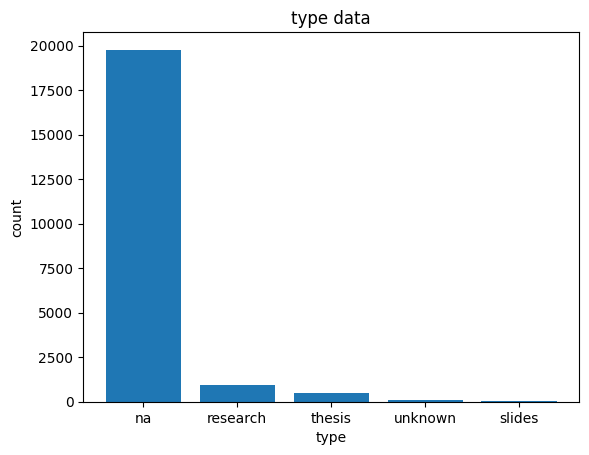

In [11]:
plot_feature("type")

What works are of "unknown" type?

In [12]:
df[df.type == "unknown"]

,title,type,citations,published_date,updated_date,text,url
id,,,,,,,
42933739,DNA adduct formation due to the gastrointestin...,unknown,None,2017-01-01T00:00:00,2021-06-25T21:31:35,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,https://core.ac.uk/download/84042579.pdf
37973996,New horizons in treatment of osteoporosis,unknown,None,2017-01-01T00:00:00,2021-06-25T21:41:23,REVIEW ARTICLE Open Access\nNew horizons in tr...,https://core.ac.uk/download/74565021.pdf
77792529,Forest genomics and biotechnology,unknown,None,2019-01-01T00:00:00,2021-06-25T22:01:57,"EDITED BY : Isabel Allona, Matias Kirst, Wout...",https://core.ac.uk/download/286549180.pdf
47068008,Transcriptomic and metabolic responses of Calo...,unknown,None,2017-12-01T00:00:00,2021-11-21T06:41:39,RESEARCH ARTICLE Open Access\nTranscriptomic a...,https://core.ac.uk/download/145643408.pdf
46228193,"Role of oxidative stress, inflammation and fib...",unknown,None,2016-12-07T02:08:16,2022-01-01T11:36:25,Boston University\nOpenBU http://open.bu.edu\n...,https://open.bu.edu/bitstream/2144/19761/1/Grz...
...,...,...,...,...,...,...,...
9006268,Statistical considerations in reporting cardio...,unknown,None,2018-08-01T00:00:00,2023-05-01T05:16:15,Edinburgh Research Explorer ...,https://core.ac.uk/download/160670502.pdf
25215557,Education and Social Work Handbook 2009,unknown,None,2009-01-01T00:00:00,2023-08-05T00:08:47,Education and Social Work\nhandbook 2009\nSet ...,https://core.ac.uk/download/41231938.pdf
2041554,Toward interoperable bioscience data,unknown,None,2012-01-01T00:00:00,2023-08-06T00:34:08,nature genetics | volume 44 | number 2 | Febru...,https://core.ac.uk/download/4169516.pdf


## Citations

Citations seem to be mostly or all `None`, making it a useless feature.

In [13]:
np.all(df.citations.isna())

True

## Dates

Convert to datetime format.

In [14]:
df["published_date"] = pd.to_datetime(df.published_date)
df["updated_date"] = pd.to_datetime(df.updated_date)

Distribution of dates.

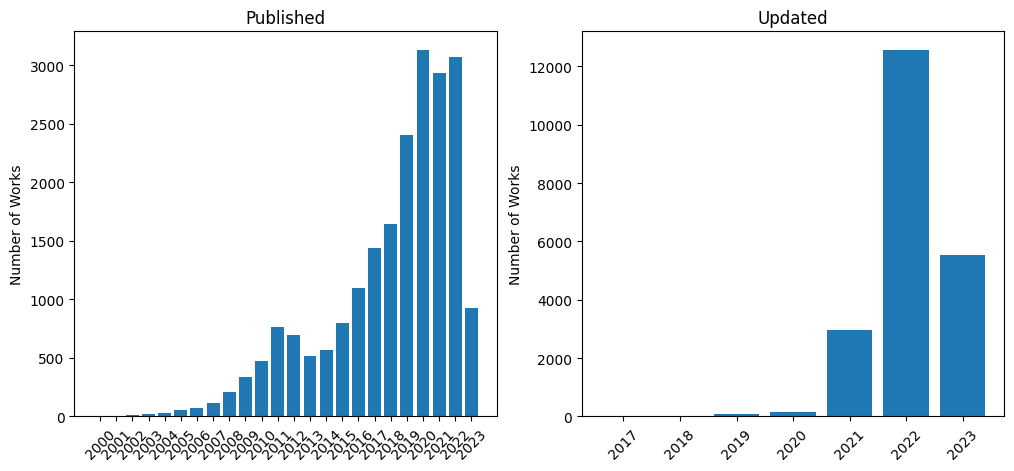

In [23]:
works_published_per_year = df.groupby(df.published_date.dt.year)["text"].count()
works_updated_per_year = df.groupby(df.updated_date.dt.year)["text"].count()
works_per_year = [works_published_per_year, works_updated_per_year]
titles = ["Published", "Updated"]

fig, axs = plt.subplots(1, len(works_per_year), figsize=(12, 5))
for i in range(len(works_per_year)):
    data = works_per_year[i]
    year, count = data.index, data.values
    axs[i].bar(year, count)
    axs[i].set_title(titles[i])
    axs[i].set_xticks(year)
    axs[i].set_xticklabels(year, rotation=45)
    axs[i].set_ylabel('Number of Works')

## Text

Works without text.

In [24]:
df.text.isna().sum()

1

In [25]:
df = df.dropna(subset="text")

Distribution of length.

In [26]:
word_counts = df.text.map(lambda x: len(x.split()))

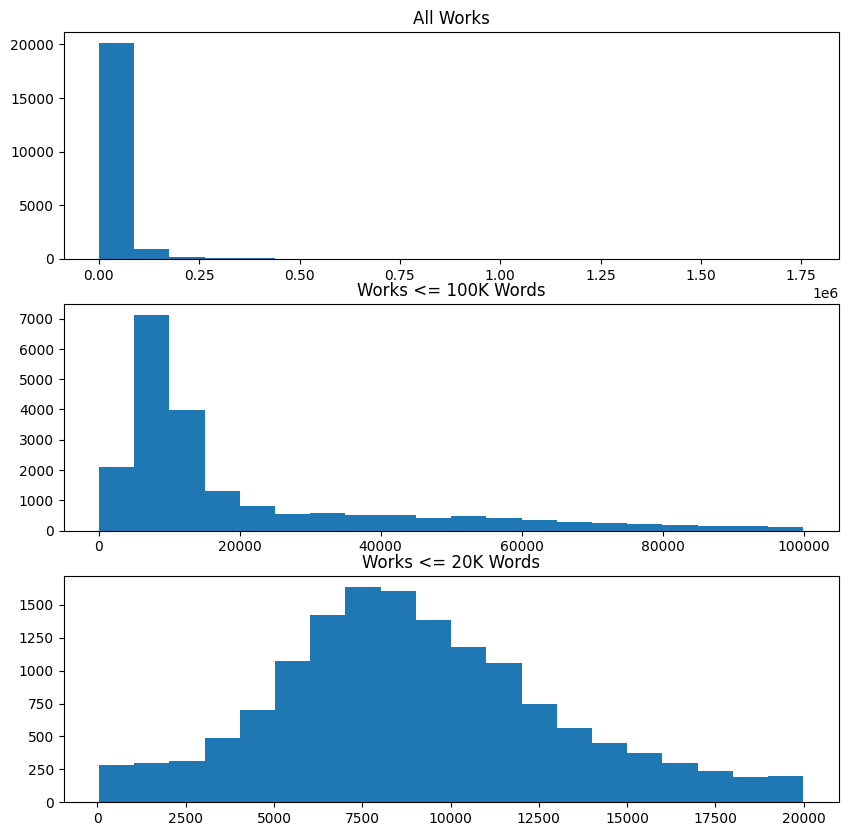

In [28]:
all_works = word_counts
medium_works = word_counts[word_counts <= 100000]
short_works = word_counts[word_counts <= 20000]
data = [all_works, medium_works, short_works]
titles = ["All Works", "Works <= 100K Words", "Works <= 20K Words"]

fig, axs = plt.subplots(len(data), 1, figsize=(10, 10))
for i in range(len(data)):
    axs[i].hist(data[i], bins=20)
    axs[i].set_title(titles[i])

Mentions of "metabolomics".

Text(0, 0.5, 'Number of Works')

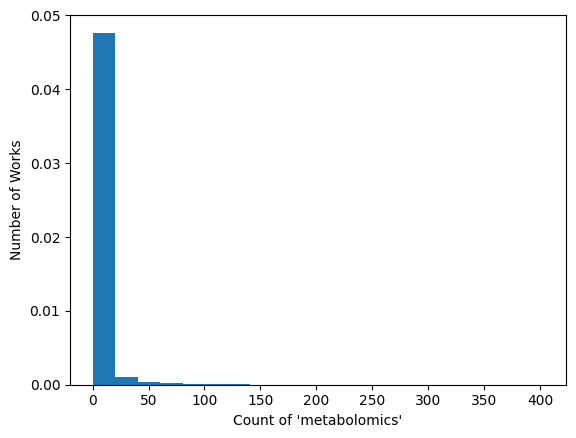

In [27]:
occurrences = df.text.map(lambda x: x.count("metabolomics"))
plt.hist(occurrences, bins=20, density=True)
plt.xlabel("Count of 'metabolomics'")
plt.ylabel("Number of Works")